In [ ]:
import os
import sklearn
import pandas as pd
import numpy as np
import nltk
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [ ]:
# Dataset
dataset_path = os.path.join(os.getcwd(), 'dataset')
raw_dataset = os.path.join(dataset_path, 'spam_message.csv')
preprocessed_dataset = os.path.join(dataset_path, 'preprocessed_spam_message.csv')
embedded_dataset = os.path.join(dataset_path, 'embedded_spam_message.pkl')

In [3]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("cc.en.300.vec")

KeyboardInterrupt: 

In [ ]:
import numpy as np

word_vector = model

def word_embedding(words: list[str]):
    """
    Takes a list of words and returns their averaged word2vec embedding.
    Words not found in the model are ignored.
    """
    vectors = []

    for w in words:
        try:
            w = w.lower()
            if w in word_vector.key_to_index:
                vectors.append(word_vector[w])
            else:
                vectors.append(np.zeros(word_vector.vector_size))
        except Exception:
            continue

    # if not vectors:
    #     return np.array(np.zeros(word_vector.vector_size))

    return np.nan if vectors == [] else vectors

# # sentence = "FastText provides efficient word embeddings".lower().split(' ')
# # vector = word_embedding(sentence)

# print(len(vector))  # (100,) or (300,) depending on model
# # type(vector)

In [ ]:
df = pd.read_csv(preprocessed_dataset, index_col='index')

df.head()

,text,class
index,,
0,bear pic nick tom pete ... dick fact type atte...,1
1,also didnt get na hi hi hi hi hi,0
2,dear -/ mood cant drive brother drive,0
3,december mobile 11mths+ entitled update latest...,1
4,\hello u.call wen u finish wrk.i fancy meetin ...,0


In [ ]:
df['text_list'] = df['text'].apply(lambda x: x.split() if isinstance(x, str) else [])

df.head()

,text,class,text_list
index,,,
0,bear pic nick tom pete ... dick fact type atte...,1,"[bear, pic, nick, tom, pete, ..., dick, fact, ..."
1,also didnt get na hi hi hi hi hi,0,"[also, didnt, get, na, hi, hi, hi, hi, hi]"
2,dear -/ mood cant drive brother drive,0,"[dear, -/, mood, cant, drive, brother, drive]"
3,december mobile 11mths+ entitled update latest...,1,"[december, mobile, 11mths+, entitled, update, ..."
4,\hello u.call wen u finish wrk.i fancy meetin ...,0,"[\hello, u.call, wen, u, finish, wrk.i, fancy,..."


In [ ]:
df['embed_vector'] = df['text_list'].apply(word_embedding)

df.head()

,text,class,text_list,embed_vector
index,,,,
0,bear pic nick tom pete ... dick fact type atte...,1,"[bear, pic, nick, tom, pete, ..., dick, fact, ...","[[-0.1318, -0.0213, -0.0437, -0.0105, -0.0594,..."
1,also didnt get na hi hi hi hi hi,0,"[also, didnt, get, na, hi, hi, hi, hi, hi]","[[-0.0764, 0.0451, -0.0883, 0.0223, -0.2671, 0..."
2,dear -/ mood cant drive brother drive,0,"[dear, -/, mood, cant, drive, brother, drive]","[[0.0358, -0.0997, -0.0147, -0.0107, 0.033, 0...."
3,december mobile 11mths+ entitled update latest...,1,"[december, mobile, 11mths+, entitled, update, ...","[[0.1012, 0.0564, -0.0415, -0.1268, 0.0861, 0...."
4,\hello u.call wen u finish wrk.i fancy meetin ...,0,"[\hello, u.call, wen, u, finish, wrk.i, fancy,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
max_text = 0
for text in df['text_list']:
    if max_text < len(text):
        max_text = len(text)

print(max_text)

82


In [ ]:
new_column = ['text', 'text_list', 'embed_vector', 'class']

df = df[new_column]
df.head()

,text,text_list,embed_vector,class
index,,,,
0,bear pic nick tom pete ... dick fact type atte...,"[bear, pic, nick, tom, pete, ..., dick, fact, ...","[[-0.1318, -0.0213, -0.0437, -0.0105, -0.0594,...",1
1,also didnt get na hi hi hi hi hi,"[also, didnt, get, na, hi, hi, hi, hi, hi]","[[-0.0764, 0.0451, -0.0883, 0.0223, -0.2671, 0...",0
2,dear -/ mood cant drive brother drive,"[dear, -/, mood, cant, drive, brother, drive]","[[0.0358, -0.0997, -0.0147, -0.0107, 0.033, 0....",0
3,december mobile 11mths+ entitled update latest...,"[december, mobile, 11mths+, entitled, update, ...","[[0.1012, 0.0564, -0.0415, -0.1268, 0.0861, 0....",1
4,\hello u.call wen u finish wrk.i fancy meetin ...,"[\hello, u.call, wen, u, finish, wrk.i, fancy,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


In [ ]:
max_vector = 0

for i, vector in enumerate(df['embed_vector']):
    try:
        if max_vector < len(vector):
            max_vector = len(vector)
    except:
        continue

print(max_vector)

82


In [ ]:
# dropp missing data
df = df.dropna()

In [ ]:
# Pad data to length 100
import copy

def pad_data_100(data):
    new_data = copy.deepcopy(data)
    
    for i in range(100-len(data)):
        new_data.append(np.zeros(model.vector_size))
    
    return new_data

df['embed_vector_padded'] = df['embed_vector'].apply(pad_data_100)
df['embed_vector_padded'].head()

index
0    [[-0.1318, -0.0213, -0.0437, -0.0105, -0.0594,...
1    [[-0.0764, 0.0451, -0.0883, 0.0223, -0.2671, 0...
2    [[0.0358, -0.0997, -0.0147, -0.0107, 0.033, 0....
3    [[0.1012, 0.0564, -0.0415, -0.1268, 0.0861, 0....
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: embed_vector_padded, dtype: object

In [ ]:
max_vector = 0

for i, vector in enumerate(df['embed_vector_padded']):
    print(len(vector))
    try:
        if max_vector < len(vector):
            max_vector = len(vector)
    except:
        continue

print(max_vector)

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [ ]:
new_column = ['text', 'text_list', 'embed_vector', 'embed_vector_padded', 'class']
df = df[new_column]

In [ ]:
# df.to_pickle(embedded_dataset)

In [ ]:
# df = pd.read_pickle(embedded_dataset)

In [ ]:
df.head()

,text,text_list,embed_vector,embed_vector_padded,class
index,,,,,
0,bear pic nick tom pete ... dick fact type atte...,"[bear, pic, nick, tom, pete, ..., dick, fact, ...","[[-0.1318, -0.0213, -0.0437, -0.0105, -0.0594,...","[[-0.1318, -0.0213, -0.0437, -0.0105, -0.0594,...",1
1,also didnt get na hi hi hi hi hi,"[also, didnt, get, na, hi, hi, hi, hi, hi]","[[-0.0764, 0.0451, -0.0883, 0.0223, -0.2671, 0...","[[-0.0764, 0.0451, -0.0883, 0.0223, -0.2671, 0...",0
2,dear -/ mood cant drive brother drive,"[dear, -/, mood, cant, drive, brother, drive]","[[0.0358, -0.0997, -0.0147, -0.0107, 0.033, 0....","[[0.0358, -0.0997, -0.0147, -0.0107, 0.033, 0....",0
3,december mobile 11mths+ entitled update latest...,"[december, mobile, 11mths+, entitled, update, ...","[[0.1012, 0.0564, -0.0415, -0.1268, 0.0861, 0....","[[0.1012, 0.0564, -0.0415, -0.1268, 0.0861, 0....",1
4,\hello u.call wen u finish wrk.i fancy meetin ...,"[\hello, u.call, wen, u, finish, wrk.i, fancy,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


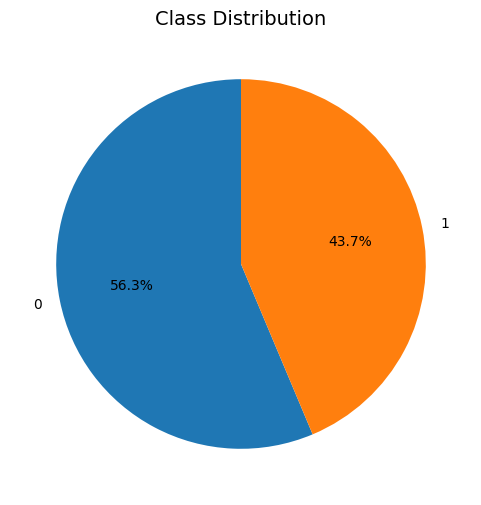

In [ ]:
import matplotlib.pyplot as plt

# Count the number of samples per class
class_counts = df['class'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts, 
    labels=class_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    # shadow=True
)

# Add title
plt.title("Class Distribution", fontsize=14)
plt.show()